# COMP 7150 Final Exam

WRITE YOUR NAME HERE: Hasan Mashrique

Note: a violation of academic misconduct results in failing the course.

----

We use the kidney disease dataset for this exam. Each row represents one person.  The target variable (classification) indicates if the person has kidney disease for not (value of 1 means having the disease; 0 mean not having the disease).  Here are the features:
```
age - age 
bp - blood pressure 
sg - specific gravity 
al - albumin 
su - sugar 
rbc - red blood cells 
pc - pus cell 
pcc - pus cell clumps 
ba - bacteria 
bgr - glucose in blood (aka blood glucose random)
bu - blood urea 
sc - serum creatinine 
sod - sodium 
pot - potassium 
hemo - hemoglobin 
pcv - packed cell volume 
wc - white blood cell count 
rc - red blood cell count 
htn - hypertension 
dm - diabetes mellitus 
cad - coronary artery disease 
appet - appetite 
pe - pedal edema 
ane - anemia 
```


In [25]:
import pandas,seaborn
%matplotlib inline




In [18]:
data = pandas.read_csv('../Datasets/kidney_disease.csv')

data.sample(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
324,40.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,119.0,...,NaN,NaN,NaN,no,no,no,good,no,no,0
89,50.0,70.0,1.02,0.0,0.0,NaN,normal,notpresent,notpresent,109.0,...,NaN,NaN,NaN,no,no,no,poor,no,no,1
190,6.0,60.0,1.01,4.0,0.0,abnormal,abnormal,notpresent,present,94.0,...,30,16700,4.8,no,no,no,poor,no,no,1


In [19]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [20]:
len(data)

400


**Note: subsequent problems implicitly refer to previous questions.**

---
**Problem 1**

Which features have more than 100 missing data points?  Create a new dataset (dataframe) without these features. Do not drop the remaining missing data at this point. You will use this new dataset for the next problems.

In [21]:
data.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

3 columns `rbc` , `wc` and `rc` have more than 100 null values. So, we remove them.

In [22]:
#data= data[~data['rbc','wc','rc']]
newdata= data.drop(columns=['rbc', 'wc','rc'])

newdata.sample(2)

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
367,68.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,125.0,41.0,...,3.8,17.4,50,no,no,no,good,no,no,0
51,54.0,100.0,1.015,3.0,0.0,normal,present,notpresent,162.0,66.0,...,4.4,10.3,33,yes,yes,no,poor,yes,no,1


---
## **Problem 2**

Use one figure to show the distribution of `age` and `glucose in blood` of the people who have kidney disease. Based on the visualization, describe the characteristics of these two variables.

In [23]:
kidney_ppl= newdata[newdata['classification']==1]

kidney_ppl.sample(2)

#len(kidney_ppl)

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
200,90.0,90.0,1.025,1.0,0.0,normal,notpresent,notpresent,139.0,89.0,...,4.1,12.0,37,yes,yes,no,good,no,no,1
225,60.0,90.0,1.010,3.0,5.0,normal,notpresent,present,490.0,95.0,...,3.8,11.5,35,yes,yes,no,good,no,no,1


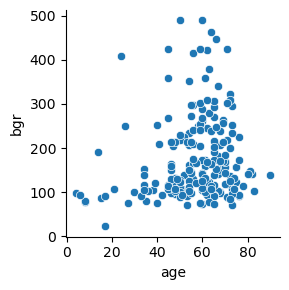

In [27]:
seaborn.relplot(data=kidney_ppl, 
                x='age', 
                y='bgr', 
               # kind= 'scatter',
               # style='cluster',
               # hue= 'cluster', 
                height=3)

We plotted a relplot to find the relationship between `age` and `gloucose in blood`. From the relplot, we can say that 
people having kidney disease who are older(age>40) have high glouce level than younger people (age<35).  

Younger people sample is small in this data suggesting they are less prone to kidney disease at a young age . But people over 40 who have high gloucose level(gloucose>100) have a high chance of having kidney disease.

---
**Problem 3**

Evaluate the prediction performance of a dummy classifier using the `stratified` strategy in terms precision and recall.

Use `age`, `blood pressure`, and `sugar` as features to make prediction of the target variable `classification`.  

Do not remove missing data unnecessarily.

Use ShuffleSplit with 100 splits, and random state 300424 to evaluate its performance.

Define features and the target explicitly.

Do you think that using more or better features will improve the performance of the dummy classifier?  Explain.

In [33]:
newdata.sample(5)

#len(newdata)

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
172,62.0,80.0,1.010,1.0,2.0,NaN,notpresent,notpresent,309.0,113.0,...,2.5,10.6,34,no,no,no,good,no,no,1
204,65.0,90.0,1.010,4.0,2.0,normal,notpresent,notpresent,172.0,82.0,...,6.3,8.8,31,yes,yes,no,good,yes,yes,1
181,45.0,70.0,1.025,2.0,0.0,abnormal,present,notpresent,117.0,52.0,...,3.8,10.0,30,no,no,no,good,no,no,1
39,82.0,80.0,1.010,2.0,2.0,NaN,notpresent,notpresent,140.0,70.0,...,4.2,13.0,40,yes,yes,no,good,no,no,1
288,56.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,70.0,46.0,...,4.9,15.9,50,NaN,NaN,NaN,good,no,no,0


In [37]:
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
#from sklearn.dummy import DummyClassifier

from sklearn.model_selection import cross_validate


In [36]:
dummy_X=newdata[['age','bp','su']]

dummy_X = pandas.DataFrame(
    data = MinMaxScaler().fit_transform(dummy_X),
    columns = dummy_X.columns,
)

dummy_y= newdata['classification']

dummy_X.sample(3)

#dummy_y.sample(3)

,age,bp,su
75,0.034091,NaN,0.0
319,0.318182,0.076923,0.0
384,0.625000,0.076923,0.0


In [38]:
dummy_model = DummyClassifier(strategy="stratified")

validator = ShuffleSplit(n_splits=100, random_state=300424)

dummy_result = cross_validate(dummy_model, dummy_X, dummy_y, cv=validator, scoring=['accuracy'])

In [42]:
dummy_result.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy'])

In [39]:
dummy_result['test_accuracy'].mean().round(2)

0.54

In [41]:
dummy_y.value_counts(1).round(2)

1    0.62
0    0.38
Name: classification, dtype: float64

So, a dummy classifier using a `stratified` strategy basically uses probabilistic approach to classify the data.
This means is maintains the probability of the data labels used in the data training. For our data, the probability is around 62% and 38%. So, whatever feature we add in the dataset, it will always try to keep the predictions closer to this ratio of percentage, meaning the 62% of the time it will predict class 1 .

Adding new features wont change this performance since the strategy is based on the output features distribution.

---
**Problem 4**

Use precision and recall to evaluate the performance of a 9-nearest neighbor classifer to predict `classification`.

Use all features to make prediction. 

Define features and the target explicitly.

1. Which cross validator should be used to validate the performance of the model?
2. Explain which processing step(s) to the data must be done and why.
3. Explain which steps need to be done to properly evaluate the performance of the model.

### **Answer**: 


- To get the precision and recall performance, we need to split the data into train and test. For this example, we use 5% of data as testing and 95% data as training.

In [99]:
knn_y = newdata['classification']

#knn_X = newdata.drop(columns=['classification'])


knn_X= pandas.get_dummies(newdata) 

clean_X= knn_X.dropna()

clean_X

new_X= clean_X.drop(columns=['classification'])

new_X = pandas.DataFrame(
    data = StandardScaler().fit_transform(new_X),
    columns = new_X.columns,
)



new_y= clean_X['classification']

print(len(new_X), len(new_y))

228 228


In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.1)

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=9)

knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

#### make the predictions using KNN

In [102]:
predictions= knn_model.predict(X_test.values)

predictions

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0])

In [103]:
y_test.to_list()

[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0]

In [105]:
len(y_test)

23

In [104]:
true_pred =list(zip(y_test, predictions))

for item in true_pred:
    print(item, end=' ')

(0, 0) (0, 0) (1, 0) (0, 0) (1, 1) (1, 1) (0, 0) (1, 0) (1, 1) (1, 1) (0, 0) (0, 0) (0, 0) (1, 1) (0, 0) (0, 0) (1, 1) (0, 0) (1, 1) (1, 1) (0, 0) (1, 1) (0, 0) 

From the predictions and actual data above,

- TP = 1 1 1 1 1 1 1 1 1 =9 
- FP = 0
- TN = 1 1 1 1 1 1 1 1 1 1 1 1  = 12
- FN = 1 1 = 2


### KNN Accuracy Measure:


 Accuracy = total correct predictions / total predictions
             = (TP + TN) / (TP + FP + TN + FN)
             
**Accuracy** = 21/23 = 0.91


**Precision** = TP / (TP + FP) = 9 / (9 + 0)= 9/ 9= 1

**Recall** = TP / (TP + FN) = 9 / (9 + 2)= 9/11= 0.81

---
## **Problem 5**

Based on the value of recall you get, explain the meaning of this value.


### **Answer 5**

The recall of the model performance is 0.81. It means out of all the kidney patients , the model predicts 81% of the kidney patients properly.

---
**Problem 6**

Transform the features using PCA with two principal components.  Visualize the transformed data on these two principal components in such a way that patients who have kidney disease and do not have the disease  have different colors.

Define the features and target explicitly.  Rescale the features before transforming them with PCA.


In [84]:
from sklearn.decomposition import PCA


In [112]:
features= newdata


features= pandas.get_dummies(features) 


## dropped the missings NAN

features= features.dropna()

we= features['classification']

features = features.drop(columns=['classification'])

len(features)

228

In [121]:
we.value_counts()

0    127
1    101
Name: classification, dtype: int64

In [113]:
standardized_data = pandas.DataFrame(
    StandardScaler().fit_transform(features).round(4),
    columns = features.columns
)


pca = PCA(n_components=2)
converted_pca = pandas.DataFrame(pca.fit_transform(standardized_data))

converted_pca.sample(3)

,0,1
175,-2.787146,0.331150
86,5.452877,-1.712631
190,-2.767995,-0.183891


In [132]:
len(converted_pca)

228

---
**Problem 7**

Based on the visualization on problem 6, characterize the difference between patients who have kidney disease and do not have the disease in terms of the two principal components.


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


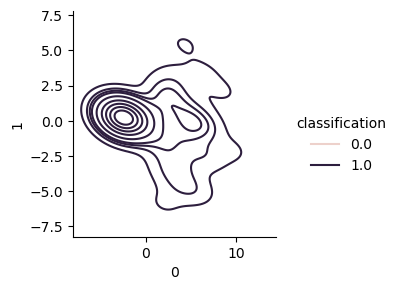

In [122]:
#seaborn.relplot(data=converted_pca, x=0, y=1, hue=we , height=3)

seaborn.displot(data=converted_pca, x=0, y=1, kind='kde', hue=we, height=3)

#seaborn.displot(data=converted_pca, x=0, y=1, hue=newdata['classification'], kind='kde', height=3)

---
**Problem 8**

Evaluate the performance of the same KNN model in problem 4, but with features that are transformed with the first 2 principal components.

Define the features and target explicitly.  


### Answer 8

For this problem, the model we are going to use is the use the knn model .

the validator is the shufflesplit. The features will be the `converted_pca` data and the y labels will be the `classifications` of the features.

In [134]:
ss = ShuffleSplit(n_splits=100)


result_knn= cross_validate(knn_model, converted_pca, we , cv=ss, scoring=['f1'])

print(result_knn['test_f1'].mean().round(2))

0.95


#### In terms of model performance(f1 score), for the converted pca data, the knn model performs better.

---
**Problem 9**

Compare the performance of the a decision tree to the KNN model in the previous problem, using features that are not transformed with PCA.

Define the features and target explicitly.  

### Answer 9

In [129]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

# validator
ss = ShuffleSplit(n_splits=100)


result_dt = cross_validate(dt, X_train, y_train, cv=ss, scoring=['f1'])
print(result_dt['test_f1'].mean().round(2))

0.98


#### The features are the same features that were used to train the knn model in problem 4.

In [131]:
result_knn= cross_validate(knn_model, X_train.values, y_train.values, cv=ss, scoring=['f1'])

print(result_knn['test_f1'].mean().round(2))

0.86


#### Based on the f1 score of both the models, we can see the decision tree classifier performs better in classifying the kidney patients than the knn model.

---
**Problem 10**

Identify the 3 most important features contributing to predicting kidney disease.  Explain how you got this.
